In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Preparation & Exploration

In [3]:
data= pd.read_csv('exchange_rate.csv')
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
data.describe()   #describing values

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [4]:
data.dtypes  #type of data

date        object
Ex_rate    float64
dtype: object

In [4]:
data.isnull().sum()   #null values

date       0
Ex_rate    0
dtype: int64

In [5]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True) #make day first

In [6]:
# Parse the date column
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.dtypes

date       datetime64[ns]
Ex_rate           float64
dtype: object

### Visualization

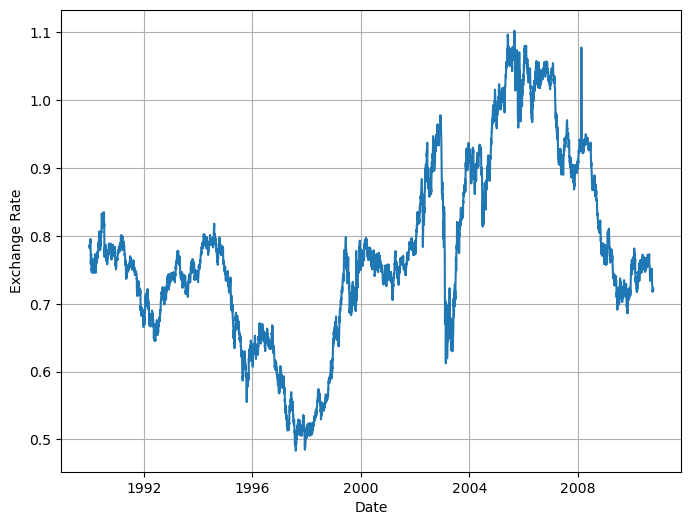

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(data['date'],data['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

### Plot time series for each currency

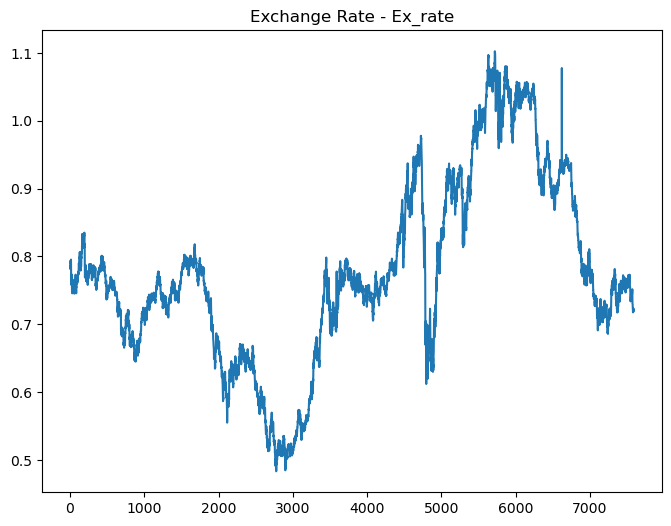

In [11]:
for currency in data.columns[1:]:
    data[currency].plot(subplots=True, figsize=(8,6))
    plt.title(f"Exchange Rate - {currency}")
    plt.show()

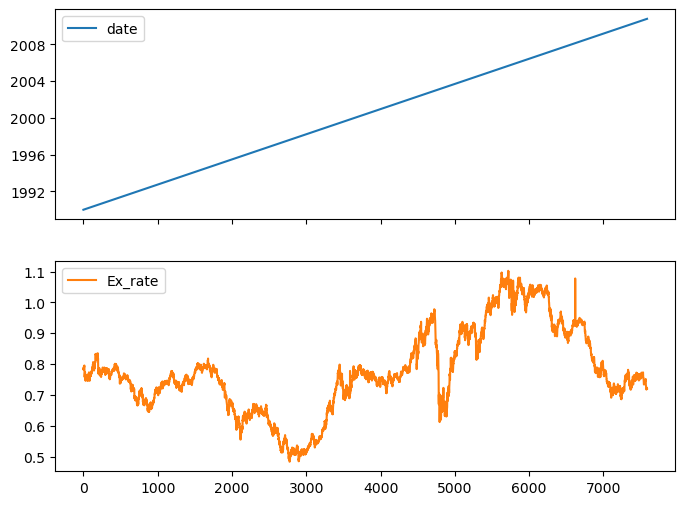

In [12]:
data.plot(subplots=True, figsize=(8,6))
plt.show()

# Part 2: Model Building - ARIMA

In [13]:
#### Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

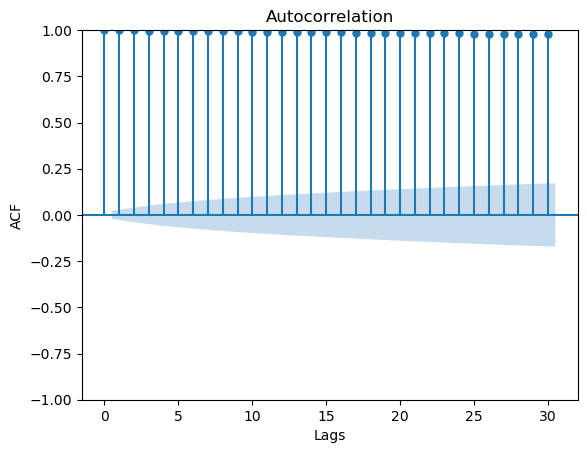

In [14]:
# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(data['Ex_rate'], lags=30)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

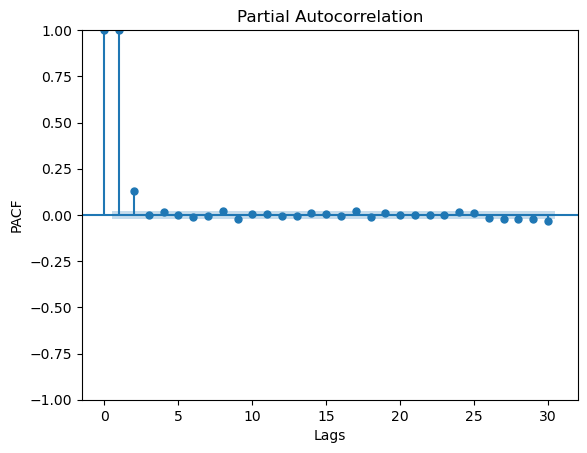

In [15]:
# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(data['Ex_rate'], lags=30)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

### Model Fitting

In [16]:
from statsmodels.tsa.arima.model import ARIMA
# Set initial parameters
p, d, q = 1, 1, 1 

# Fit ARIMA model
model = ARIMA(data['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

model_fit.summary()  # summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 18 Sep 2024   AIC                         -56102.322
Time:                        19:11:48   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Diagnostics

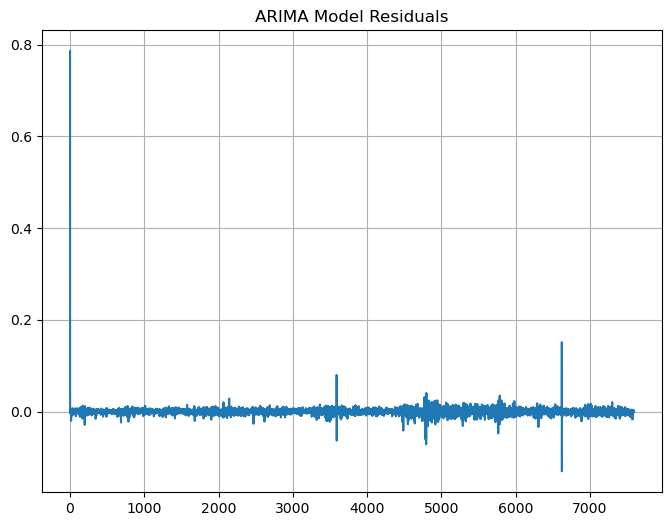

In [17]:
# Residuals plot
residuals = model_fit.resid
plt.figure(figsize=(8, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

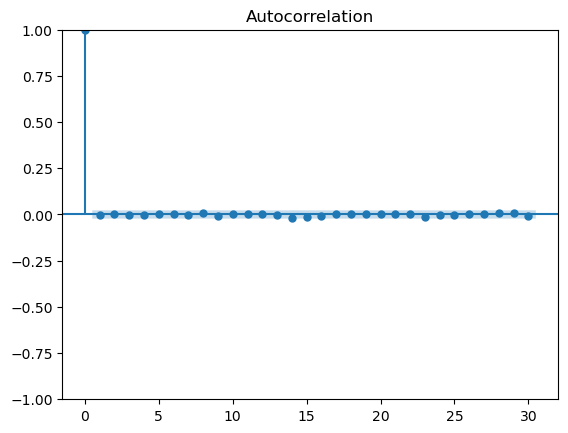

In [18]:
# plot ACF of residuals
plt.figure(figsize=(8,6))
plot_acf(residuals, lags=30)
plt.show()

<Figure size 800x600 with 0 Axes>

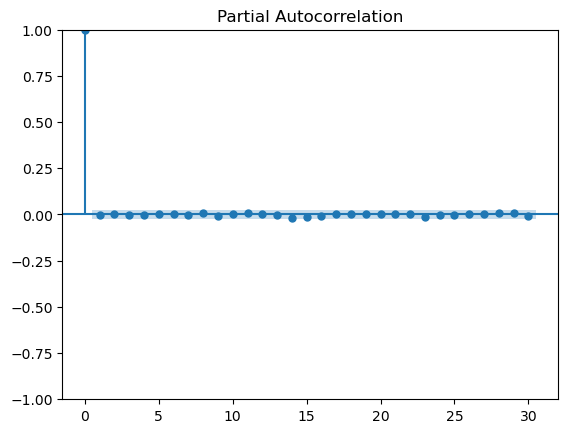

In [20]:
# plot PACF of residuals
plt.figure(figsize=(8,6))
plot_pacf(residuals, lags=30)
plt.show()

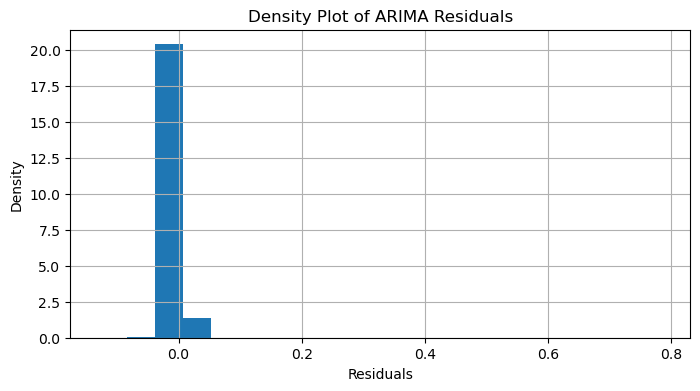

In [28]:
# Density plot of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=20, density=True)
plt.title('Density Plot of ARIMA Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## Forecasting

In [21]:
# Forcasting
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=data['date'].iloc[-1],
                               periods=forecast_steps+1)
forecast_dates = forecast_dates[1:]

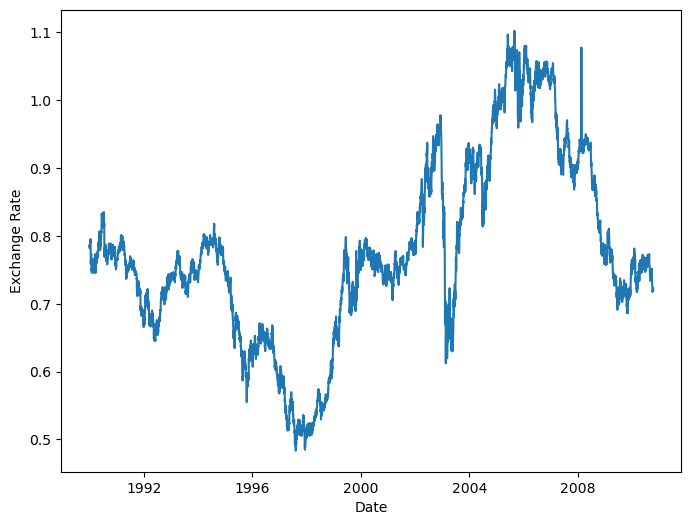

In [22]:
# plotting the actual value
plt.figure(figsize=(8, 6))
plt.plot(data['date'],data['Ex_rate'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

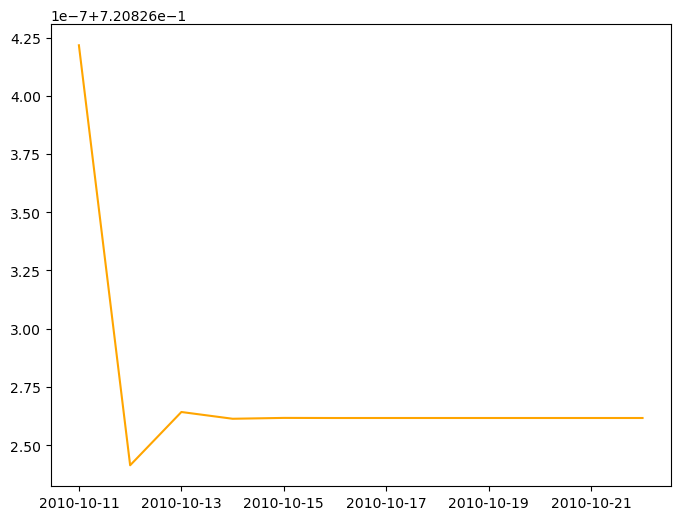

In [23]:
# Forcasting values plot
plt.figure(figsize=(8, 6))
plt.plot(forecast_dates,forecast, label='Forecast', color='orange')
plt.show()

# Part 3: Model Building - Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
es_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)

In [25]:
es_model_fit = es_model.fit(optimized=True)
es_model_fit.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77628.560
Trend:,None,BIC,-77531.479
Seasonal:,Additive,AICC,-77628.488
Seasonal Periods:,12,Date:,"Wed, 18 Sep 2024"
Box-Cox:,False,Time:,19:13:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8698373,alpha,True
smoothing_seasonal,3.6912e-06,gamma,True


In [26]:
# Forcasting
es_forecast = es_model_fit.forecast(steps=forecast_steps)

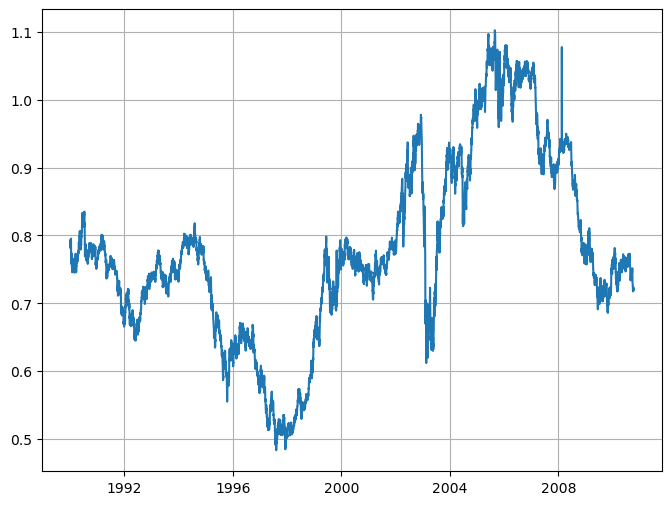

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(data['date'],data['Ex_rate'], label='Actual')
plt.grid(True)
plt.show()

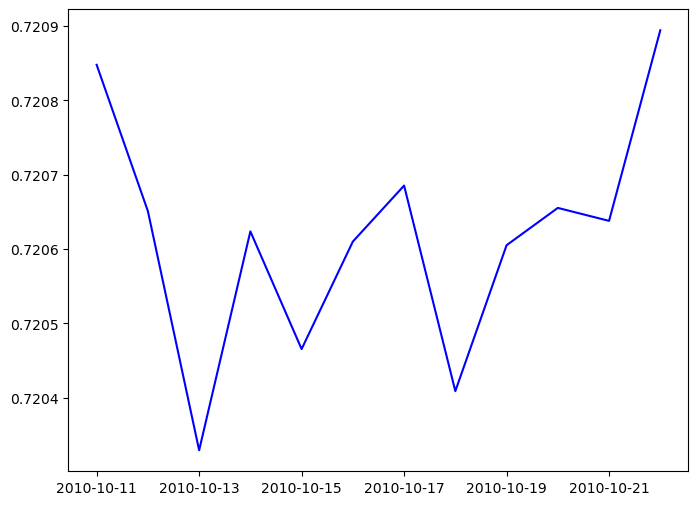

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(forecast_dates,es_forecast, label="Forecast", color='blue')
plt.show()

# Part 4: Evaluation and Comparison

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(data['Ex_rate'][-forecast_steps:], forecast)
RMSE = mean_squared_error(data['Ex_rate'][-forecast_steps:], forecast, squared=False)

In [31]:
MAE

0.0016644924340379526

In [32]:
RMSE

0.002000358073451703

In [33]:
# Compute error metrics for Exponential Smoothing
ES_MAE = mean_absolute_error(data['Ex_rate'][-forecast_steps:], es_forecast)
ES_RMSE = mean_squared_error(data['Ex_rate'][-forecast_steps:], es_forecast, squared=False)

print(f'Exponential Smoothing MAE: {ES_MAE}')
print(f'Exponential Smoothing RMSE: {ES_RMSE}')

Exponential Smoothing MAE: 0.0015781974314659404
Exponential Smoothing RMSE: 0.001871752270401754
